# Determine the Entry Points of Momentum Strategy
---

A **short-term moving average crossing above one or more long-term moving averages** is a frequently cited **momentum strategy** in technical analysis. It suggests that **recent price momentum** is outpacing the **broader historical trend**, potentially signaling a **bullish** shift. Below is an outline of how such a strategy might be structured:



### 1. Choose Your Moving Averages

1. **Short-Term Moving Average (MA\_S)**  
   - Typically calculated over a **shorter window** (e.g., 10, 20, or 50 days).  
   - Reflects **recent price momentum**.

2. **Long-Term Moving Average (MA\_L)**  
   - Uses a **longer window** (e.g., 100 or 200 days).  
   - Smoother and more indicative of **overall trend**.

You can use **simple** (SMA) or **exponential** (EMA) moving averages; the latter gives more weight to recent prices.

<br>

### 2. The Crossover Signal

- **Bullish Crossover**: Occurs when MA\_S **crosses above** MA\_L, suggesting upward momentum is overtaking the longer-term average.  
- **Bearish Crossover** (if using it for exits or short trades): Occurs when MA\_S **crosses below** MA\_L.

<br>

### 3. Entry & Exit Rules

1. **Entry (Long Position)**  
   - **Enter** a long position when the **short-term MA** crosses above the **long-term MA**.  
   - This signal implies a potential uptrend.

2. **Stop-Loss Placement**  
   - Set a **stop-loss** below a recent swing low or a certain percentage/ATR distance below entry to manage risk.

3. **Exit (Close Position)**  
   - **Exit** the long position if the moving averages **cross back** (MA\_S dips below MA\_L).  
   - Optionally, you may also exit if a certain profit target is reached or if price violates a key support level.

<br>

### 4. Adding Filters & Enhancements

1. **Volume Confirmation**  
   - Look for **high volume** during the crossover, which may increase confidence in the signal.

2. **Trend Confirmation**  
   - Validate that the long-term MA is **sloping upward**, indicating a genuine uptrend rather than sideways market noise.

3. **Combining with Other Indicators**  
   - Use oscillators (like **RSI**, **MACD**) to confirm overbought/oversold conditions or confirm momentum strength.

4. **Risk Management**  
   - Position size should align with your **risk per trade** (e.g., 1%–2% of capital).  
   - Consider a **trailing stop** if the trade moves significantly in your favor.

<br>

### 5. Advantages

- **Easy to Understand**  
  - Crossover points are straightforward to identify.
- **Clear Signals**  
  - Provides unambiguous long/short entries and exits.
- **Historically Resilient**  
  - Widely studied, with many variations (e.g., the Golden Cross of 50-day & 200-day SMAs).

<br>

## 6. Disadvantages

- **Lagging Indicator**  
  - Moving averages use historical prices, so signals often **lag** real-time market turns.
- **False Signals in Sideways Markets**  
  - Whipsaws can occur when price is choppy and MAs converge/diverge frequently.
- **Delayed Exits**  
  - Can give back significant gains if a trend reverses sharply before the crossover occurs.

<br>


### Key Takeaways

A momentum strategy based on **short-term MA crossing above long-term MAs** can be effective in **trending markets**, capturing substantial moves when prices sustain directional momentum. However, it’s crucial to implement **risk management** and possibly **additional filters** to mitigate the risk of false breakouts and to handle the inherent lag of moving-average-based signals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib as ta
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

Download the stock data from Yahoo Finance

In [2]:
start  = '2010-01-04'
end    = '2022-03-29'

df = yf.download("V", start=start, end=end, auto_adjust=False)
df = df.stack(level=1).rename_axis(['Date', 'Ticker']).reset_index(level=1)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,V,19.751957,22.035000,22.192499,21.865000,22.000000,20180000
2010-01-05,V,19.525620,21.782499,21.882500,21.500000,21.825001,25833600
2010-01-06,V,19.263428,21.490000,21.770000,21.475000,21.752501,16254000
2010-01-07,V,19.442699,21.690001,21.750000,21.387501,21.492500,27841200
2010-01-08,V,19.496490,21.750000,21.847500,21.557501,21.705000,11907200


In the code below, we compute the **15-day** and **35-day** **simple moving averages (SMAs)** to represent our short-term and long-term trends, respectively. To calculate these, we utilize the **SMA** function from the **ta-lib** library:

1. **Short-Term SMA (15-Day)**  
2. **Long-Term SMA (35-Day)**  

These moving averages serve as the basis for identifying potential crossover signals in our momentum strategy.

In [3]:
df["SMA_15"] = ta.SMA(df["Close"], 15)
df["SMA_35"] = ta.SMA(df["Close"], 35)

df.tail()

Price,Ticker,Adj Close,Close,High,Low,Open,Volume,SMA_15,SMA_35
Date,,,,,,,,,
2022-03-22,V,213.477783,218.470001,219.570007,217.179993,217.839996,6259900,205.283999,216.326571
2022-03-23,V,209.774368,214.679993,217.289993,214.199997,215.300003,6008000,205.697332,215.821428
2022-03-24,V,212.344299,217.309998,217.660004,214.000000,214.990005,5487000,206.369332,215.304000
2022-03-25,V,213.438705,218.429993,218.929993,215.690002,218.419998,5051400,207.578665,214.929428
2022-03-28,V,215.725220,220.770004,220.979996,217.509995,218.500000,4316800,209.583332,214.711714


Let's plot the data for the last year

In [4]:
data = df[-252:]

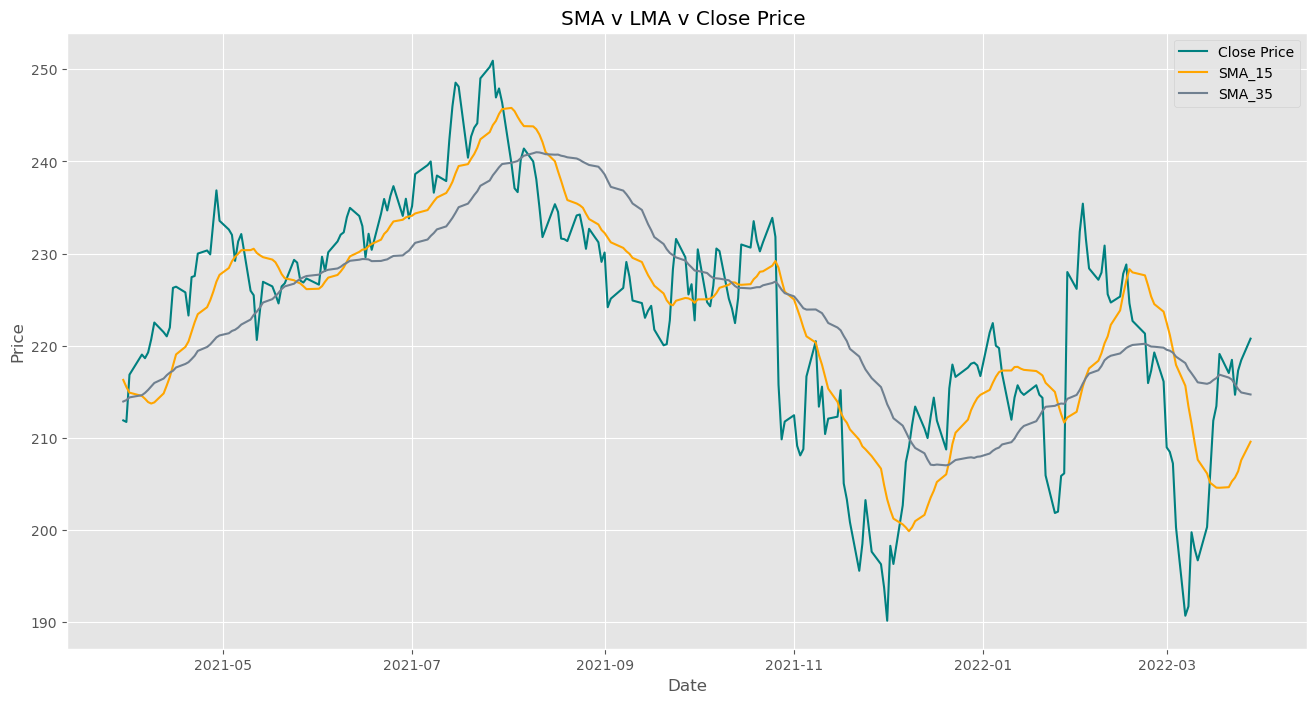

In [5]:
plt.figure(figsize=(16, 8))

plt.plot(data["Close"],  color='teal', label='Close Price')
plt.plot(data["SMA_15"], color='orange', label='SMA_15')
plt.plot(data["SMA_35"], color='slategray', label='SMA_35')

plt.title("SMA v LMA v Close Price ")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend();

Below is a simple illustration of how to detect the **crossover** (intersection) points between the **15-day SMA (`SMA_15`)** and the **35-day SMA (`SMA_35`)** using consecutive day comparisons. The logic is:

1. On **Day 1** (`shift(1)`) – **`SMA_15`** is **below** **`SMA_35`**.  
2. On **Day 2** (current day) – **`SMA_15`** is **above** **`SMA_35`**.

When both conditions are true, a **bullish crossover** occurs (i.e., the short-term moving average has moved above the long-term moving average).



### Step-by-Step

#### 1. Compute the Previous Day’s SMAs
We use the `shift(1)` method in pandas to reference the **previous day’s** values:

In [6]:
df['SMA15_shift1'] = df['SMA_15'].shift(1)
df['SMA35_shift1'] = df['SMA_35'].shift(1)

#### 2. Formulate the Crossover Condition
A crossover (buy signal) happens when:
- **Day 1**: `SMA15_shift1 < SMA35_shift1` (short-term SMA was below long-term SMA)
- **Day 2**: `SMA_15 > SMA_35` (short-term SMA is now above long-term SMA)

We can combine these conditions with the logical **AND** operator (`&`).

#### 3. Use `np.where` to Generate Signals

In [7]:
df['signal'] = np.where(
    (df['SMA15_shift1'] < df['SMA35_shift1']) &
    (df['SMA_15'] > df['SMA_35']),
    1,  # true
    0   # false
)

#### 4. Interpreting the Result
- A **1** in the `signal` column indicates a point in time where **SMA_15** just crossed **above** **SMA_35** (a bullish crossover).
- A **0** indicates no bullish crossover on that day.

#### Example Visualization
It’s often helpful to **plot** both SMAs and highlight the points where crossovers occur. Again we'll do it for the past year (252 trading days) for illustration purposes


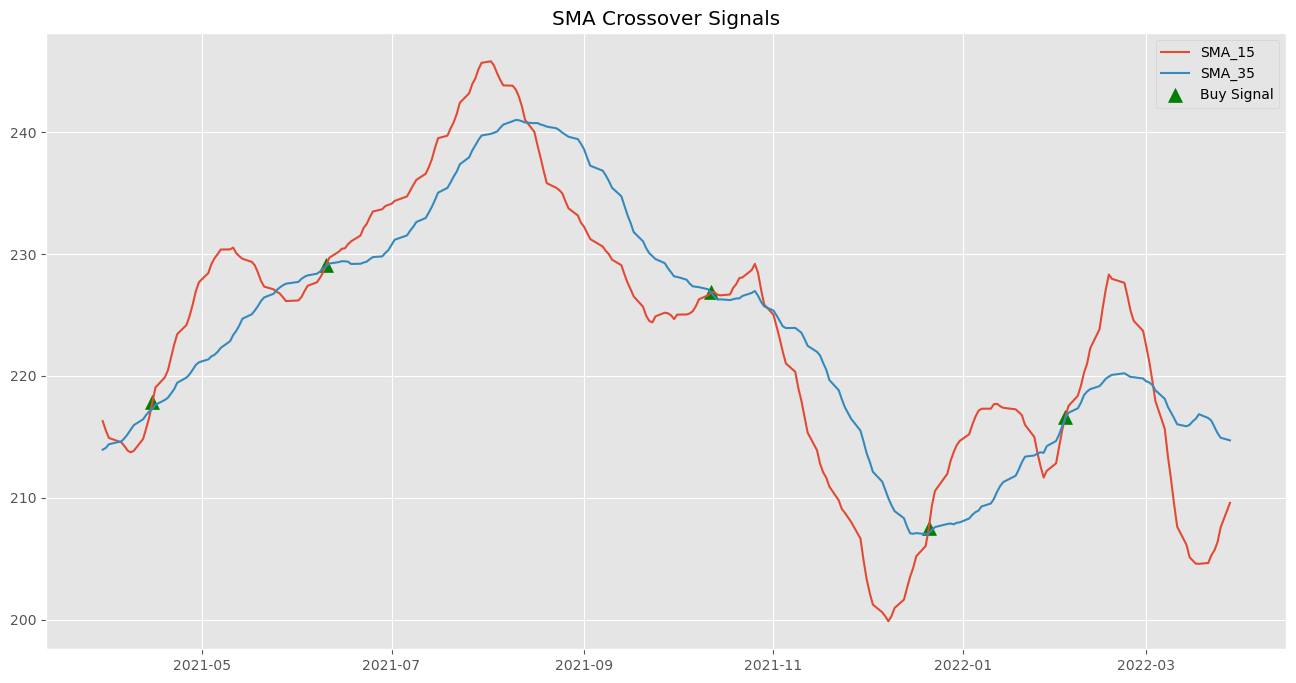

In [8]:
data = df[-252:]

plt.figure(figsize=(16,8))
plt.plot(data['SMA_15'], label='SMA_15')
plt.plot(data['SMA_35'], label='SMA_35')

# highlight crossover points
buy_signals = data[data['signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['SMA_15'], marker='^', color='green', label='Buy Signal', s=100)

plt.title('SMA Crossover Signals')
plt.legend()
plt.show()

# Exit Using Fixed Stop-Loss and Take-Profit
---

Now that we've calculated our entry points how are we going to exit the trades?

Below is an example of how you can implement a fixed stop-loss and take-profit exit strategy in Python to manage positions initiated by the signal (SMA crossover)

#### Conceptual Overview

- Entry Trigger: You enter a position (e.g., a buy) when a buy signal is generated (for instance, from a moving average crossover).
- Stop-Loss (SL): If the price moves against your entry by a certain percentage (or amount), you close the position to limit losses.
- Take-Profit (TP): If the price moves in favor of your entry by a certain percentage (or amount), you close the position to secure profits.
- One Position at a Time: For simplicity, this example tracks only one open position (long) at once.

#### Define Parameters

Choose your stop-loss and take-profit thresholds etc, either as percentages or absolute values:

In [9]:
entry_time = np.nan
entry_price = np.nan

# Variables to add stop-loss and take-profit for an open position
stop_loss_price = np.nan
take_profit_price = np.nan

# Take-profit and stop-loss levels
take_profit_percentage = 0.03
stop_loss_percentage = 0.01

A **trade book** is a record or ledger of all the trades (buy and sell transactions) executed by a trader, brokerage, or financial institution. In the context of **financial markets**, a trade book typically includes:

- **Dates and times** of each trade  
- **Asset information** (e.g., stock ticker, currency pair)  
- **Transaction details** (quantity bought or sold, price, fees)  
- **Counterparty** (if relevant, such as an exchange or another broker)  

Trade books are used for **tracking performance**, **analyzing trading behavior**, **verifying compliance** with regulations, and **reconciling** positions and profits/losses. They act as a central reference for all trading activity over a given period.

Obviously, our trade book is going to be relatively simple. Let's set up a DataFrame to track our trades:

In [20]:
trade_book = pd.DataFrame(index=None, columns=['Position', 'Entry Time', 'Entry Price', 'Exit Time', 'Exit Price', 'PnL'])

To monitor whether we are currently **in a trade or not**, we initialize a **position variable** with two possible values:

- **0** for **no open position** (we are not holding any securities).
- **1** for a **long position** (we have bought the security).

We typically pair this with a variable to store the **entry price**, which is set when we open a trade (position changes from 0 to 1). This data allows us to calculate potential gains/losses and exit the position under predefined stop-loss or take-profit conditions.

In [11]:
current_position = 0

## The Backtest
---

Below is the **step-by-step** breakdown of how the **backtest** processes entry and exit logic at each data point:

1. **Check If No Position Is Currently Open** (`current_position == 0`):  
   - If a **buy signal** (`1`) appears, we **open** a position:
     - **Entry Price** = current price  
     - **Entry Time** = current timestamp  
     - `current_position` = 1 (indicating a long position)  
     - Calculate **stop-loss** and **take-profit** levels based on the entry price.

2. **Check If a Position Is Already Open** (`current_position == 1`):  
   - Examine **current price** against the **stop-loss** and **take-profit** levels:
     - If **stop-loss** is hit:  
       - **Exit Price** = stop-loss level (or current price)  
       - **Exit Time** = current timestamp  
       - Calculate and record **PnL** (using Entry Price, Exit Price).  
       - Record this trade in the **trade book** (Entry Time, Exit Time, Entry Price, Exit Price, PnL).  
       - `current_position` = 0  
     - Else if **take-profit** is reached:  
       - **Exit Price** = take-profit level (or current price)  
       - **Exit Time** = current timestamp  
       - Calculate and record **PnL** (using Entry Price, Exit Price).  
       - Record this trade in the **trade book** (Entry Time, Exit Time, Entry Price, Exit Price, PnL).  
       - `current_position` = 0

By following this approach at each step in the dataset, the backtest systematically **opens** and **closes** positions while recording all essential trade details in a **trade book**, ultimately providing a **comprehensive performance** overview of the strategy.

The following function calculates the trading cost and the profit and loss

(change the cost to whatever your broker charges)

In [12]:
def long_exit(data, time, entry_time, entry_price):
    trade_cost = data.loc[time, 'Close'] * 0.0002 * 2
    pnl =  round(data.loc[time, 'Close'] - entry_price, 2)
    pnl =  pnl - trade_cost
    return pd.DataFrame([('Long', entry_time, entry_price, time, data.loc[time, 'Close'], pnl)],
                        columns=['Position', 'Entry Time', 'Entry Price', 'Exit Time', 'Exit Price', 'PnL'])

### Run the strategy

- Long Position (if branch)
- Long Exit (elif branch)

In [21]:
for time in df.index:

    if (current_position == 0) and (df.loc[time, 'signal'] == 1):
        current_position  = 1
        entry_time        = time
        entry_price       = df.loc[time, 'Close']
        stop_loss_price   = entry_price * (1 - stop_loss_percentage)
        take_profit_price = entry_price * (1 + take_profit_percentage)

    elif (current_position == 1):
        if df.loc[time, 'Close'] < stop_loss_price or df.loc[time, 'Close'] > take_profit_price:
            trade_details    = long_exit(df, time, entry_time, entry_price)
            trade_book       = pd.concat([trade_book, trade_details])
            trade_book.reset_index(inplace=True, drop=True)
            current_position = 0

trade_book.tail()

,Position,Entry Time,Entry Price,Exit Time,Exit Price,PnL
39,Long,2021-04-15,226.279999,2021-04-20,223.279999,-3.089312
40,Long,2021-06-10,233.949997,2021-06-16,229.600006,-4.441840
41,Long,2021-10-12,224.050003,2021-10-15,230.990005,6.847604
42,Long,2021-12-21,215.380005,2022-01-04,222.460007,6.991016
43,Long,2022-02-03,231.539993,2022-02-04,228.389999,-3.241356


### Visualise the entry and exit points

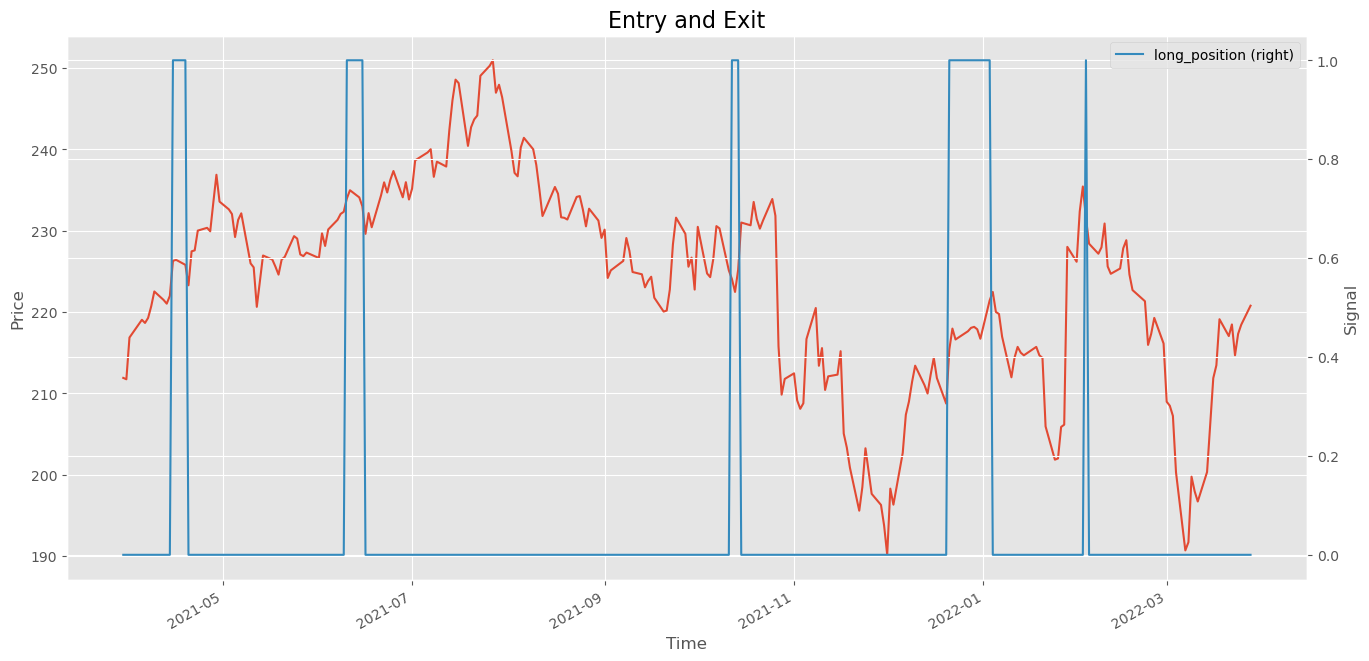

In [22]:
df['long_position'] = np.nan

df.loc[df.index.isin(trade_book['Entry Time']), 'long_position'] = 1
df.loc[df.index.isin(trade_book['Exit Time']),  'long_position'] = 0
df.long_position.fillna(method='ffill', inplace=True)

data = df[-252:]

plt.figure(figsize=(16, 8))
close = data['Close'].plot()
ax2   = data['long_position'].plot(secondary_y=True, ax=close)

ax2.set_title('Entry and Exit', fontsize=16)
close.set_ylabel('Price')
close.set_xlabel('Time')
ax2.set_ylabel('Signal')

plt.legend()
plt.grid()
plt.show()

### Plot the returns of the strategy:

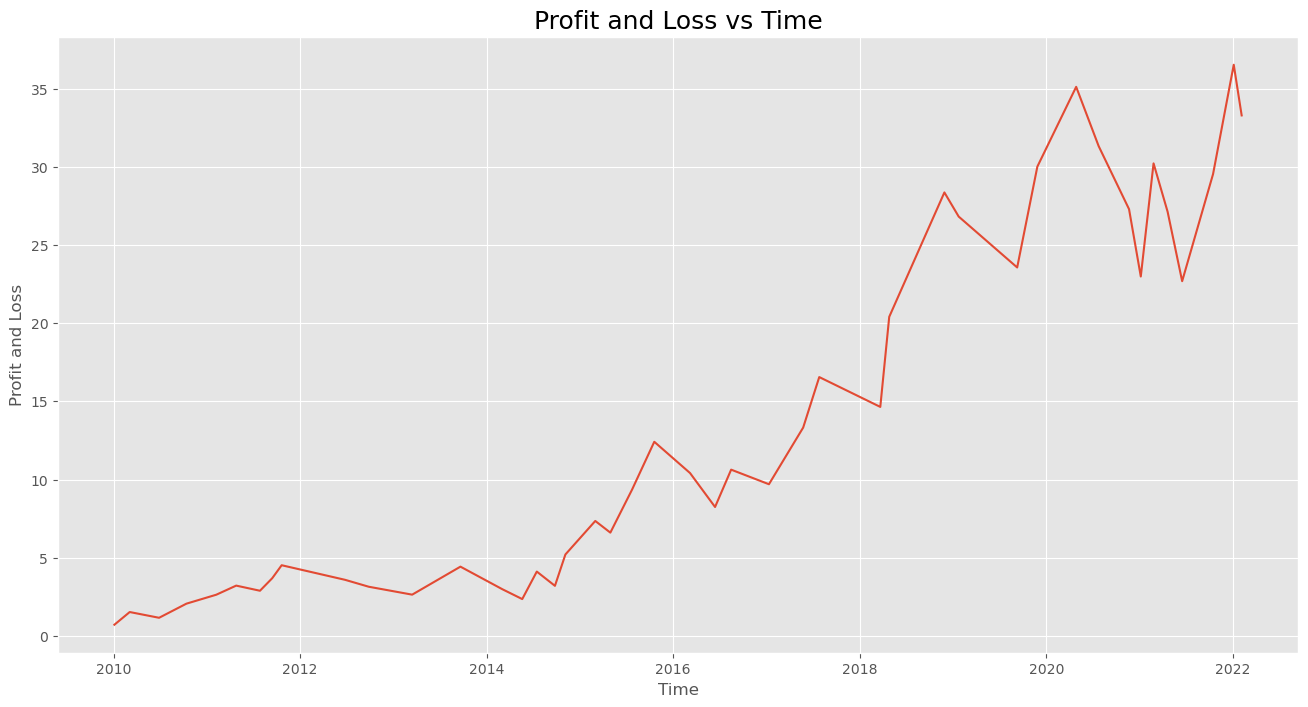

In [23]:
plt.figure(figsize=(16, 8))

plt.title("Profit and Loss vs Time", fontsize=18)
plt.xlabel("Time")
plt.ylabel("Profit and Loss")

plt.plot(trade_book['Exit Time'], trade_book.PnL.cumsum())
plt.show()

Using a **fixed stop-loss and take-profit** approach to exit positions can indeed lead to **suboptimal outcomes**—especially in volatile markets. Since the exit thresholds are determined **at entry** and remain **unchanged**, any significant shifts in volatility during the trade are ignored. As a result, the strategy may lock in losses during unexpected price swings or miss out on larger moves if the market volatility temporarily spikes or drops. Looking at the **2019–2022 returns** visually highlights these shortcomings, showing how a more adaptive exit strategy might have captured or protected against market movements more effectively.

# EITHER FIX CODE BELOW OR DELTE IT

# Using ATR

Average True Range (ATR) is a widely used technical analysis indicator that measures market volatility. It does not indicate price direction but rather the degree of price movement or "range" over a specified period, which is typically 14 periods.


Below, we calculate the **Average True Range (ATR)** over a **14-day period** to measure an asset’s volatility. The **ATR** is derived from the **True Range (TR)**, which represents how much the price fluctuates in one period (day/candle). Formally:

**1. True Range Calculation**

$$
\text{TR} = \max \Bigl[
   \text{High} - \text{Low},
   \bigl|\text{High} - \text{Previous Close}\bigr|,
   \bigl|\text{Low} - \text{Previous Close}\bigr|
\Bigr]
$$

**2. Average True Range**

$$
\text{ATR} = \frac{1}{n}\sum_{i=1}^{n} \text{TR}_i
$$

Using **`ta.ATR()`** from the **`talib`** library, we pass in the **High**, **Low**, and **Close** price series plus the desired `timeperiod` (14, in this case).

You can adjust the `timeperiod` parameter to **suit your strategy or market conditions**—for instance, using 7 days for shorter-term volatility or 20 days for a longer perspective.

In [28]:
df['ATR'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['ATR'].tail()

Date
2022-03-22    6.427167
2022-03-23    6.273084
2022-03-24    6.086436
2022-03-25    5.883118
2022-03-28    5.710753
Name: ATR, dtype: float64

In [29]:

entry_time = np.nan
entry_price = np.nan

# Variables to track the stop-loss and take-profit for an open position
stop_loss_price = np.nan
take_profit_price = np.nan

# Take-profit and stop-loss levels
take_profit_multiple = 2
stop_loss_multiple = 1.5

# Dataframe trade_book to show the details of the each trade
trade_book = pd.DataFrame(index=None, columns=['Position', 'Entry Time', 'Entry Price', 'Exit Time', 'Exit Price', 'PnL'])

# We will initialise variables to keep track of the open position
# Here, 0 represents no open position and 1 represents a long position
current_position = 0

In [30]:
def long_exit(data, time, entry_time, entry_price):
    trade_cost = data.loc[time, 'Close'] * 0.0002 * 2
    pnl = round(data.loc[time, 'Close'] - entry_price, 2)
    pnl = pnl - trade_cost
    return pd.DataFrame([('Long', entry_time, entry_price, time, data.loc[time, 'Close'], pnl)],
                        columns=['Position', 'Entry Time', 'Entry Price', 'Exit Time', 'Exit Price', 'PnL'])

## Run the strategy

In [31]:
trade_book.head()

,Position,Entry Time,Entry Price,Exit Time,Exit Price,PnL


In [27]:
for time in df.index:
    # Long Position
    if (current_position == 0) and (df.loc[time, 'signal'] == 1):
        current_position = 1
        entry_time  = time
        entry_price = df.loc[time, 'Close']
        stop_loss_price   = entry_price - df.loc[time, 'ATR'] * stop_loss_multiple
        take_profit_price = entry_price + df.loc[time, 'ATR'] * take_profit_multiple

    # Long Exit
    elif (current_position == 1):
        if df.loc[time, 'Close'] < stop_loss_price or df.loc[time, 'Close'] > take_profit_price:
            trade_details = long_exit(df, time, entry_time, entry_price)
            trade_book = pd.concat([trade_book, trade_details])
            trade_book_.reset_index(inplace=True, drop=True)
            current_position = 0

trade_book.tail()

KeyError: 'ATR'

In [ ]:
df['long_position'] = np.nan

df.loc[df.index.isin(trade_book['Entry Time']) ,'long_position'] = 1
df.loc[df.index.isin(trade_book['Exit Time']) ,'long_position'] = 0
df.long_position.fillna(method='ffill', inplace=True)

data = df[-252:]
plt.figure(figsize=(16, 8))

close = data['Close'].plot(label='Close Price')
ax2   = data['long_position'].plot(secondary_y=True, ax=close)

ax2.set_title('Entry and Exit', fontsize=16)
close_price_line.set_ylabel('Price')
close_price_line.set_xlabel('Date')
ax2.set_ylabel('Signal')

plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
plt.title("Profit and Loss of ATR strategy", fontsize=16)

plt.xlabel("Date")
plt.ylabel("Profit and Loss")

plt.plot(trade_book['Exit Time'], trade_book.PnL.cumsum(), label='PnL')
plt.legend()
plt.show()

## Comparing Stop Loss(SL) and Average True Range (ATR)

In [ ]:

def analytics(trades, column_name):

    df = pd.DataFrame(index=[column_name])
    df['num_of_long']        = len(trades.loc[trades.Position=='Long'])
    df['net_profit']         = trades.PnL.sum()
    df['profitbale_trades']  = len(trades.loc[trades.PnL > 0])
    df['loss_making_trades'] = len(trades.loc[trades.PnL <= 0])
    df['win_percentage']     = 100 * analytics.winners / analytics.num_of_long
    df['loss_percentage']    = 100 * analytics.losers / analytics.num_of_long
    df['profit_per_trade']   = trades.loc[trades.PnL > 0].PnL.mean()
    df['loss_per_trade']     = trades.loc[trades.PnL <=0].PnL.mean()

    return df.T

# Call the get_analytics function and store output in result
result = pd.concat([analytics(fixed_SL_TP_trade_book, 'fixed_SL_TP'),
                    analytics(ATR_trade_book, 'ATR_SL_TP')], axis=1)
result